Utilizaremos datos descargados de Kaggle sobre la cantidad de libros per capita por cada año y pais.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

Cargamos nuestros datos en una variable

In [3]:
df = pd.read_csv('new-books-per-million.csv new.csv')
print(df.head())

    Entity Code  Year Book titles per capita (Fink-Jensen 2015)
0  Belgium  BEL  1500                                      25.6
1   France  FRA  1500                       351.764.705.882.353
2  Germany  DEU  1500                     4.523.809.523.809.520
3  Ireland  IRL  1500                                         0
4    Italy  ITA  1500                     6.530.000.000.000.000


Vemos la cantidad de filas y columnas

In [7]:
df.shape

(8312, 4)

El tipo de datos de cada columna

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8312 entries, 0 to 8311
Data columns (total 4 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Entity                                     8312 non-null   object
 1   Code                                       8312 non-null   object
 2   Year                                       8312 non-null   int64 
 3   Book titles per capita (Fink-Jensen 2015)  8312 non-null   object
dtypes: int64(1), object(3)
memory usage: 259.9+ KB


Podemos apreciar que solo año esta considerado como numero y las demas columnas como texto. Sin embargo, Book titles per capita (Fink-Jensen 2015) es una variable numerica, por lo cual debemos transformarla

Primero debemos eliminar los puntos de la cadena del numero

In [10]:
df['Book titles per capita (Fink-Jensen 2015)'] = df['Book titles per capita (Fink-Jensen 2015)'].str.replace('.','')

<ipython-input-10-3234b743e575>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Book titles per capita (Fink-Jensen 2015)'] = df['Book titles per capita (Fink-Jensen 2015)'].str.replace('.','')


Luego convertimos la columna a tipo de datos flotante

In [11]:
df['Book titles per capita (Fink-Jensen 2015)'] = df['Book titles per capita (Fink-Jensen 2015)'].astype(float)

Verificamos nuevamente el tipo de datos de cada columna

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8312 entries, 0 to 8311
Data columns (total 4 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Entity                                     8312 non-null   object 
 1   Code                                       8312 non-null   object 
 2   Year                                       8312 non-null   int64  
 3   Book titles per capita (Fink-Jensen 2015)  8312 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 259.9+ KB


Confirmamos que no hayan nulos

In [13]:
df.isnull().sum()

Entity                                       0
Code                                         0
Year                                         0
Book titles per capita (Fink-Jensen 2015)    0
dtype: int64

Vemos los estadisticos de las columnas numericas

In [14]:
df.describe()

,Year,Book titles per capita (Fink-Jensen 2015)
count,8312.000000,8.312000e+03
mean,1799.014317,1.221315e+16
std,160.522828,1.297594e+16
min,1500.000000,0.000000e+00
25%,1657.000000,3.355739e+15
50%,1792.000000,7.732920e+15
75%,1960.000000,1.600195e+16
max,2009.000000,7.855464e+16


Podemos apreciar que para Year el minimo año es 2015 el maximo 2009.

Sin embargo para la columna Book titles per capita (Fink-Jensen 2015), el maximo y los demas cuartiles se ven dentro de la misma magnitud, no asi el minimo, por lo cual veremos como se distribuyen esos datos.

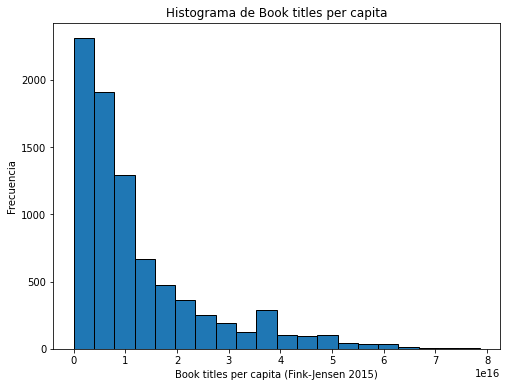

In [21]:
plt.figure(figsize=(8, 6))
plt.hist(df['Book titles per capita (Fink-Jensen 2015)'], bins=20, edgecolor='black')  # Ajusta el número de bins según tus necesidades

plt.xlabel('Book titles per capita (Fink-Jensen 2015)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Book titles per capita')
plt.show()

O podemos verlo mediante un boxplot

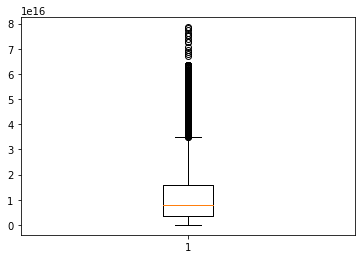

In [15]:
plt.figure()
plt.boxplot(df['Book titles per capita (Fink-Jensen 2015)'])
plt.show()

Como también los podemos ver agrupados y saber la cantidad exacta

In [16]:
conteo = df['Book titles per capita (Fink-Jensen 2015)'].value_counts()
print(conteo)

0.000000e+00    290
3.823530e+16    162
7.486630e+15    117
8.500000e+01    100
6.000000e+00     99
               ... 
4.523810e+15      1
1.772604e+16      1
1.213302e+16      1
1.573960e+16      1
3.870715e+15      1
Name: Book titles per capita (Fink-Jensen 2015), Length: 7328, dtype: int64


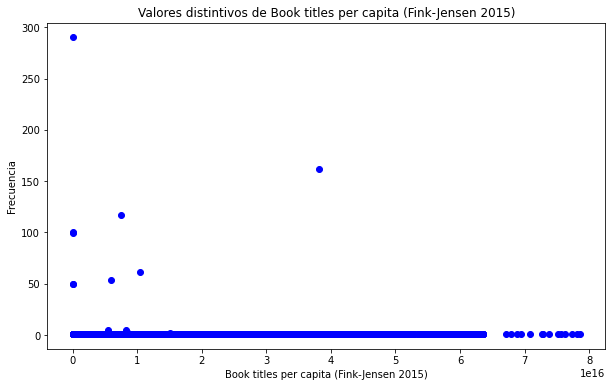

In [23]:
# Obtenemos los valores únicos y su frecuencia
valores_unicos = df['Book titles per capita (Fink-Jensen 2015)'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(valores_unicos.index, valores_unicos.values, marker='o', linestyle='', color='b')

plt.xlabel('Book titles per capita (Fink-Jensen 2015)')
plt.ylabel('Frecuencia')
plt.title('Valores distintivos de Book titles per capita (Fink-Jensen 2015)')
plt.show()

Vemos que la mayoría de los datos se encuentran en los números más bajos, por lo cual seguiremos adelante.